#### Ким Вячеслав WIN-1-21

#### Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#### Загрузка датасета

In [2]:
df = pd.read_csv('train.csv', low_memory=False)

#### Исследование датасета

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.shape

(100000, 28)

In [7]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

#### Визуализация данных 

<Axes: xlabel='count', ylabel='Occupation'>

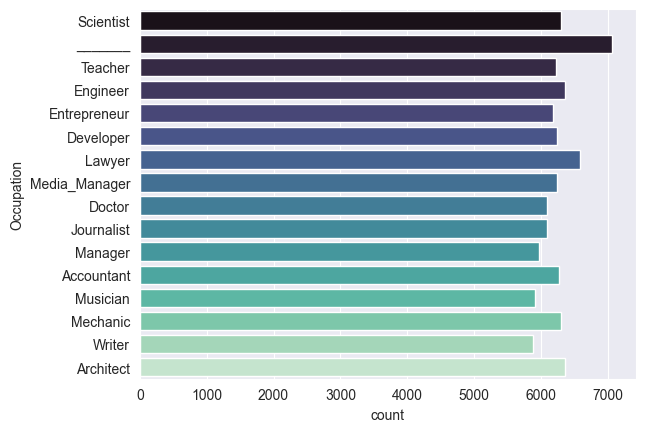

In [8]:
sns.countplot(y='Occupation', hue='Occupation', data=df, palette='mako', legend=False)

<Axes: xlabel='count', ylabel='Credit_Score'>

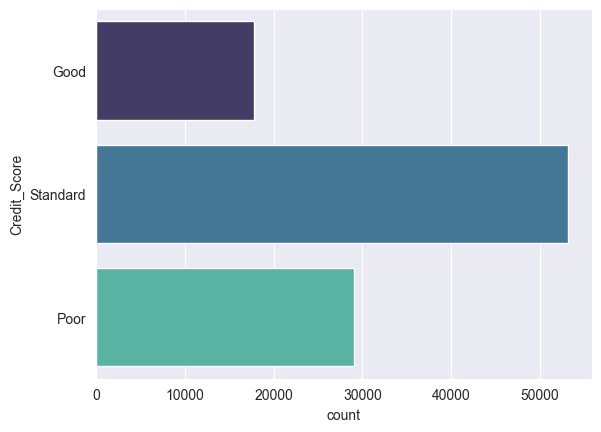

In [9]:
sns.countplot(y='Credit_Score', hue='Credit_Score', data=df, palette="mako", legend=False)

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

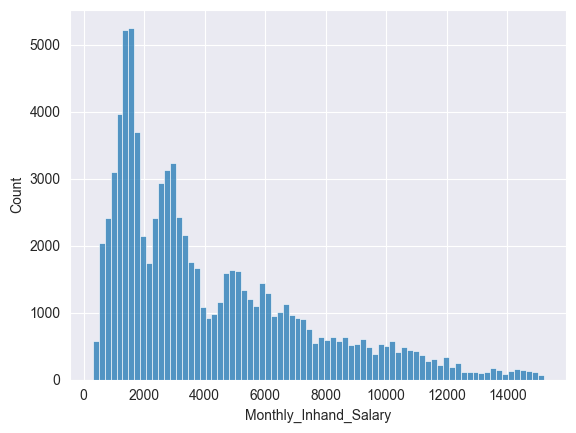

In [10]:
sns.histplot(df['Monthly_Inhand_Salary'])

#### Определение наличия пропущенных значений

In [11]:
df.isna().any()
df = df.dropna()

#### Проверьте на содержвание символа "_" 

In [12]:
df.apply(lambda x: x.astype(str).str.contains('_')).any()
df = df.map(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)

#### Возможно некоторые стоблцы должны иметь числовое значение, но они имеют строковые значения. Обработайте

In [13]:
df['ID'] = df['ID'].apply(lambda x: int(x, 16))

df['Customer_ID'] = df['Customer_ID'].str.replace('CUS ', '').apply(lambda x: int(x, 16))

numerical_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                     'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### Mapping

In [14]:
mapping = {
    'Scientist': 1,
    'Teacher': 2,
    'Engineer': 3,
    'Entrepreneur': 4,
    'Lawyer': 5,
    'Media_Manager': 6,
    'Doctor': 7,
    'Journalist': 8,
    'Manager': 9,
    'Mechanic': 10,
    'Writer': 11,
    'Accountant': 12,
    'Architect': 13,
    'Musician': 14,
    'Developer': 15
}

df['Occupation_nums'] = df['Occupation'].apply(lambda x: mapping.get(x, 0))

In [15]:
mapping = {
    'Good': 0,
    'Standard': 1,
    'Bad': 2
}
    
df['Mix_Credit'] = df['Credit_Mix'].apply(lambda x: mapping.get(x))

In [16]:
mapping = {
    'High spent Small value payments': 1,
    'Low spent Small value payments': 2,
    'High spent Large value payments': 3,
    'Low spent Large value payments': 4,
    'High spent Medium value payments': 5,
    'Low spent Medium value payments': 6
}

df['Behaviour_Payment'] = df['Payment_Behaviour'].apply(lambda x: mapping.get(x))

In [17]:
mapping = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3,
}

df['Score_Credit'] = df['Credit_Score'].apply(lambda x: mapping.get(x))

#### Если посчитаете нужным , можете удалить некоторые стоблцы. 

In [18]:
columns_to_drop = ['Name', 'Month', 'SSN', 'Type_of_Loan', 'Occupation', 'Changed_Credit_Limit', 
                   'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan']

df.drop(columns=columns_to_drop, inplace=True)
df.dtypes

ID                            int64
Customer_ID                   int64
Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Occupation_nums               int64
Mix_Credit                  float64
Behaviour_Payment           float64
Score_Credit                  int64
dtype: object

#### Визуализация данных (после обработки)

<Axes: xlabel='count', ylabel='Occupation_nums'>

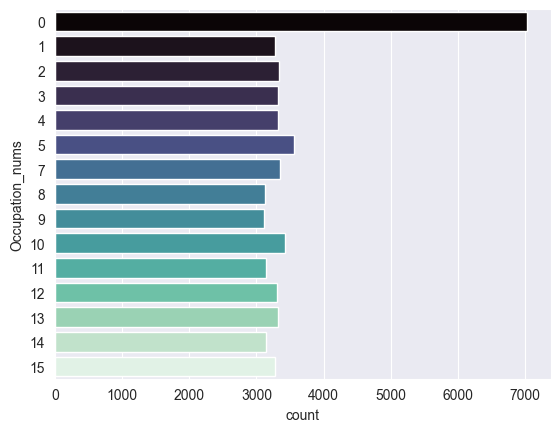

In [19]:
sns.countplot(y='Occupation_nums', hue='Occupation_nums', data=df, palette='mako', legend=False)

<Axes: xlabel='count', ylabel='Score_Credit'>

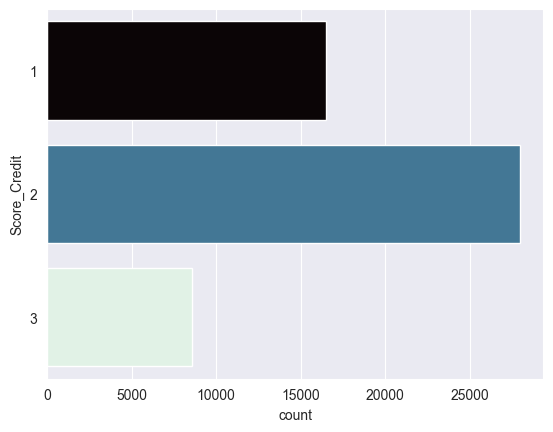

In [20]:
sns.countplot(y='Score_Credit', hue='Score_Credit', data=df, palette="mako", legend=False)

#### Обучите модель алгоритмами классификации: Logreg, Decision Tree, Random Forest

In [21]:
df = df.dropna()

X, y = df.drop(columns=['Score_Credit']), df['Score_Credit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

#### Предсказание на тестовом наборе (например, accuracy, precision, recall, F1-score).

In [25]:
logistic_regression_predict = logistic_regression.predict(X_test)
decision_tree_predict = decision_tree.predict(X_test)
random_forest_predict = random_forest.predict(X_test)

accuracy_lr = accuracy_score(y_test, logistic_regression_predict)
precision_lr = precision_score(y_test, logistic_regression_predict, average='weighted')
recall_lr = recall_score(y_test, logistic_regression_predict, average='weighted')
f1_lr = f1_score(y_test, logistic_regression_predict, average='weighted')

accuracy_dt = accuracy_score(y_test, decision_tree_predict)
precision_dt = precision_score(y_test, decision_tree_predict, average='weighted')
recall_dt = recall_score(y_test, decision_tree_predict, average='weighted')
f1_dt = f1_score(y_test, decision_tree_predict, average='weighted')

accuracy_rf = accuracy_score(y_test, random_forest_predict)
precision_rf = precision_score(y_test, random_forest_predict, average='weighted')
recall_rf = recall_score(y_test, random_forest_predict, average='weighted')
f1_rf = f1_score(y_test, random_forest_predict, average='weighted')

print("Логистическая регрессия:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

print("\nДерево решений:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

print("\nСлучайный лес:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Логистическая регрессия:
Accuracy: 0.3132517838939857
Precision: 0.6201931093882972
Recall: 0.3132517838939857
F1-score: 0.14957054916249254

Дерево решений:
Accuracy: 0.6880733944954128
Precision: 0.6876889099396027
Recall: 0.6880733944954128
F1-score: 0.6878496328011623

Случайный лес:
Accuracy: 0.7753312945973496
Precision: 0.7753492750907245
Recall: 0.7753312945973496
F1-score: 0.7752384934730548


D:\Coding\pythona\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Визуализация

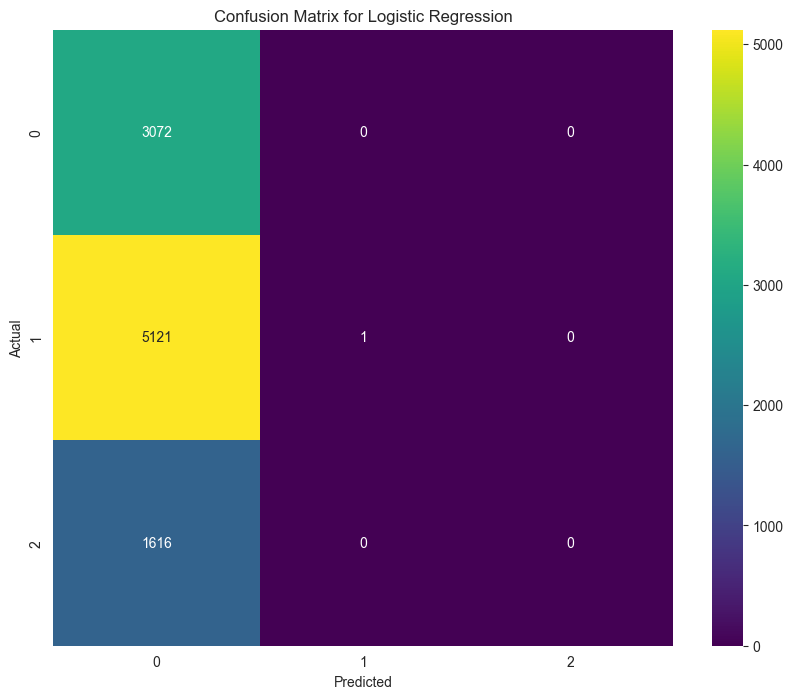

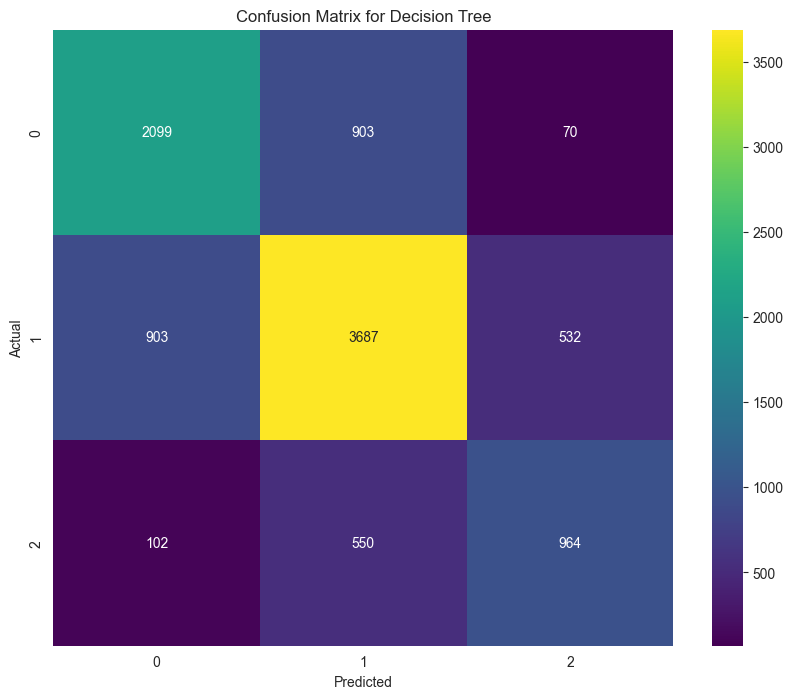

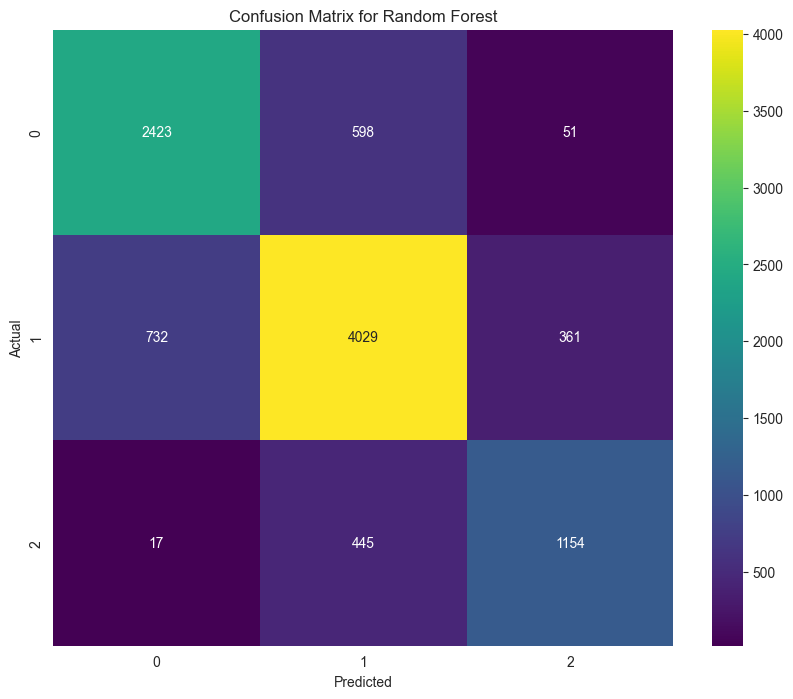

In [26]:
# Logistic regression
conf_matrix_lr = confusion_matrix(y_test, logistic_regression_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree
conf_matrix_dt = confusion_matrix(y_test, decision_tree_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Random Forest
conf_matrix_rf = confusion_matrix(y_test, random_forest_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

#### Проанализируйте результаты и сделайте выводы о качестве модели.